# Transformer architecture 
## (Sberloga 17.12.2021)

### Transformer

* Transformer architecture: sources of inspiration
  * Bahdanau additive attention
  * Google Neural Machine Translation System
* Scaled dot-product attention
  * key-value database analogy; Q,K,V; dot-product as a cosine distance proxy
  * Scaling of softmax: Bolzman distribution temperature analogy, Haemoglobin cooperativity
* Multihead attention as an analogue to Convoloutional NNs
* Layer norm
  * Why norms work? Example: fast and slow variables in enzyme kinetics.
  * Batch norm
  * Layer norm for RNNs vs Batch norm
* Skip connections
  * Long skip connections, U-Net
  * Short skip connections, ResNet, Dense net
* Positional Encoding
* Computational complexity

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import Image

## Transformer architecture: sources of inspiration

Transformer architecture is a direct continuation of 2 previous systems: 

* Bahdanau additive attention (2015)
* Google Neural Machine Translation (2016)

## Bahdauanu additive attention (2015)

[Neural Machine Translation by Jointly Learning to Align and Translate](https://arxiv.org/pdf/1409.0473.pdf)

* encoder-decoder architecture, based on bi-LSTM
* Too slow from engineering standpoint

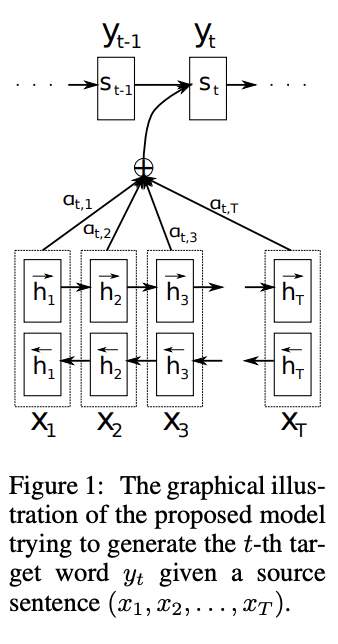

In [14]:
Image("./img/Bahdanau_attention.png")

Bahdanau decoder attends to the hidden states $\vec{h_j}$ of encoder bi-LSTM and decides, how much they impact the next word, before generating it. 

The weighted some of attentions is called context vector $c_t = \sum \limits_{j=1} \alpha_j h_j$, where weights of attention $\alpha_j$ to each of the encoder hidden states  $\vec{h_j}$ are calculated as softmax of alignment weights $\alpha_{t,j} = \frac{e^{e_{t,j}}}{\sum \limits_i e^{e_{i,j}}}$ and $e_{i,j} = a(s_{t-1},h_j)$. Alignment function $a$ is trained as a feed-forward neural network.

## Google Neural Machine Translation System (2016)

[Google’s Neural Machine Translation System: Bridging the Gap
between Human and Machine Translation](https://arxiv.org/pdf/1609.08144.pdf)

* encoder-decoder architecture, based on bi-LSTM
* attention
* skip-connections

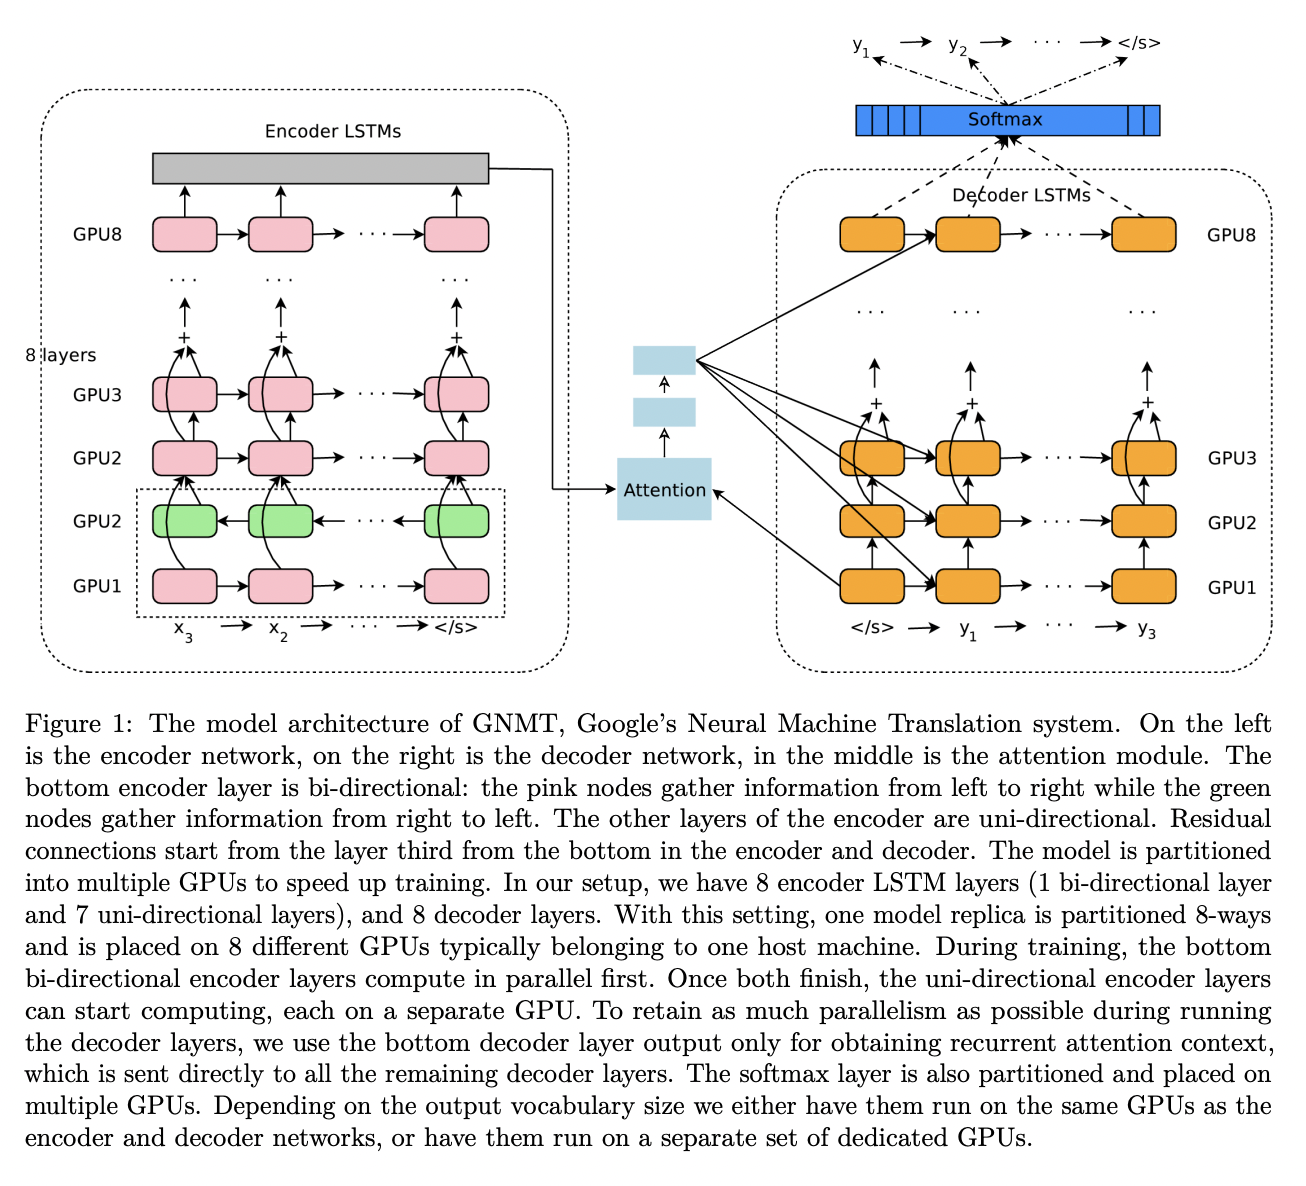

In [10]:
Image("./img/gnmt_with_caption.png")

## Transformer architecture (2017)

[Attention is all you need](https://arxiv.org/pdf/1706.03762.pdf)

* encoder-decoder architecture
* multihead scaled-dot product attention/self-attention
* layer norm
* skip-connections
* positional encoding
* masking in decoder

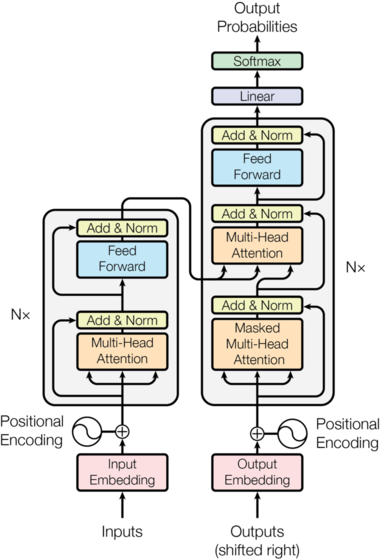

In [7]:
Image("./img/transformer.png")

## Scaled dot-product attention: the general idea

* Queries, keys, values: key-value database analogy.
* Dot product as a measure of similarity between query and key 
* Scaling of dot product in softmax: temperature in Bolzman distribution

## Scaled dot-product attention: key-value database analogy

Queries, Keys and Values. If a query is similar to a key, the corresponding value gets a high weight in the output. 

Great explanation: https://stats.stackexchange.com/questions/421935/what-exactly-are-keys-queries-and-values-in-attention-mechanisms.


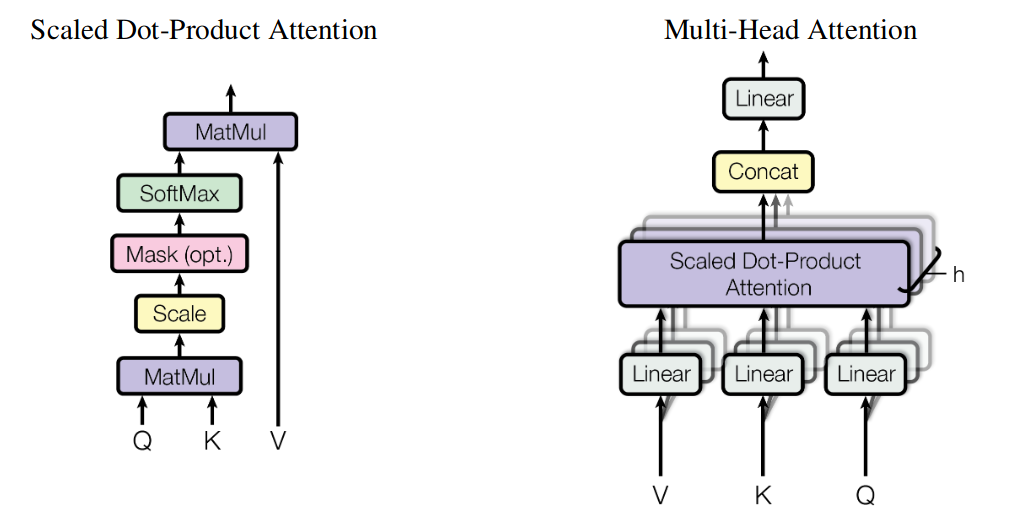

In [16]:
Image("./img/scaled_dot_product_attention.png")

## Scaling in scaled dot-product attention: Softmax and Boltzmann distribution

Softmax formula:

$$p_i =  \frac{e^{\frac{E_i}{\sqrt{n}}}}{\sum \limits_j e^{\frac{E_j}{\sqrt{n}}}}$$

Recall Boltzmann distribution:

$$p_i = \frac{e^{-\frac{\Delta E_i}{kT}}}{\sum \limits_j e^{-\frac{\Delta E_j}{kT}}}$$

In softmax similarity between query and key acts as energy, and scaling factor - as temperature. The lower the temperature - the more even the distribution.  


## Multihead attention

Each attention head of a layer $j$ is an analogue of a convolution filter in convolutional neural network's layer $j$. 

The hierarchy of attention heads works similarly to the hierarchy of CNN filters. 

TODO

## Layer norm: why using norms?

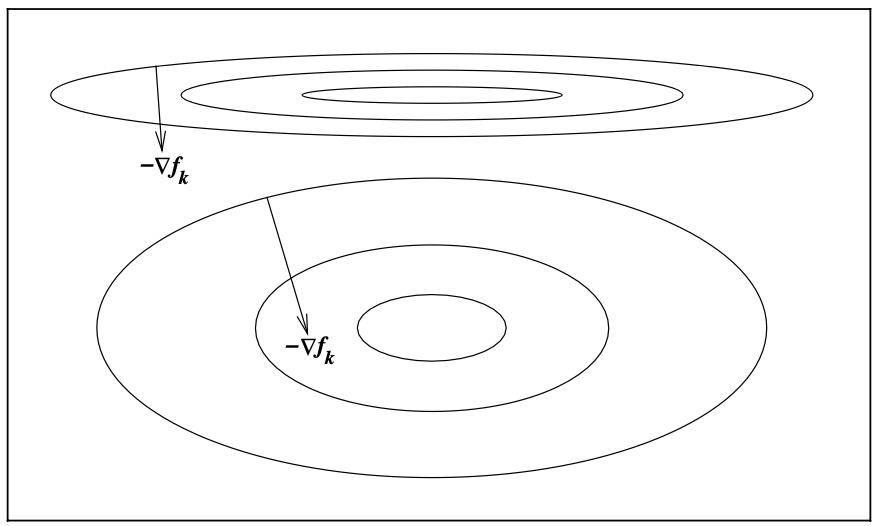

In [2]:
Image("./img/norm_and_gradient.png")

Imagine that we are searching for a minimum of function $f(x,y)$ of a fast variable $x$ and a slow variable $y$. 

If rate of change of $x$ is orders of magnitude larger than that of $y$, linear optimization methods such as gradient descent hop from one side of the basin to the other and converge very slowly. 

Re-scaling the variables to be of the same order fixes this.

## Batch norm

[Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift](https://arxiv.org/pdf/1502.03167.pdf)

## Layer norm in RNNs

[Layer Normalization](https://arxiv.org/pdf/1607.06450.pdf)

* Gradient in RNN explodes/vanishes: https://d2l.ai/chapter_recurrent-neural-networks/bptt.html
* Gradient clipping is required to prevent this; application of norm helps a lot as well.
* Batch norm
  * requires fixed batch size
  * can not be parallelized
* Thus, Layer norm in NLP.

## Skip connections

Two different kinds of skip connections appeared in 2015 in two different papers for different purposes.

### Long skip-connections in U-Net

To mirror features between encoder and decoder in hourglass architecture.

### Short skip-connections in ResNet

To enforce consistency: deeper CNN should work at least as good as a shallower one.

## Long skip connections in U-Net

[U-Net: Convolutional Networks for Biomedical Image Segmentation](https://arxiv.org/pdf/1505.04597.pdf)

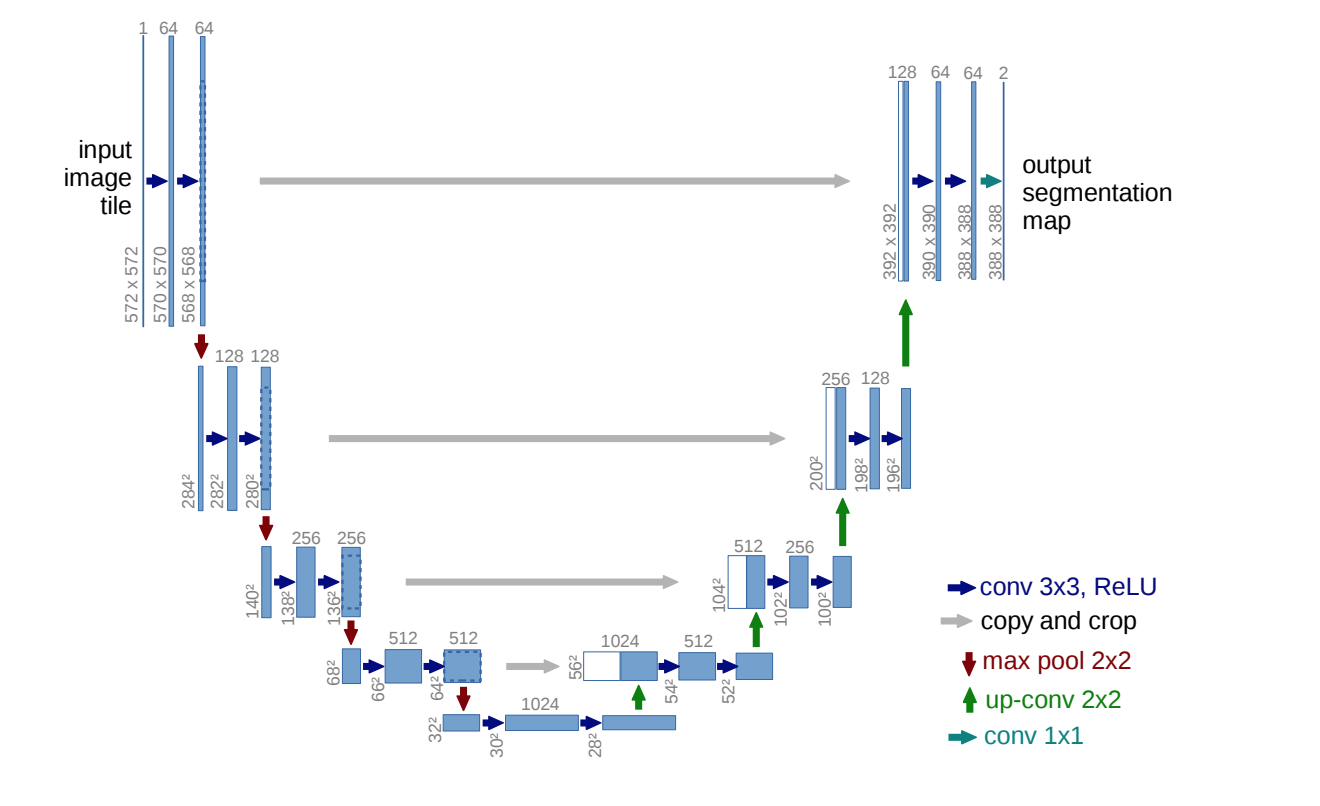

In [3]:
Image("./img/u-net.png")

## Short skip-connections in ResNet

[Deep Residual Learning for Image Recognition](https://arxiv.org/pdf/1512.03385.pdf)

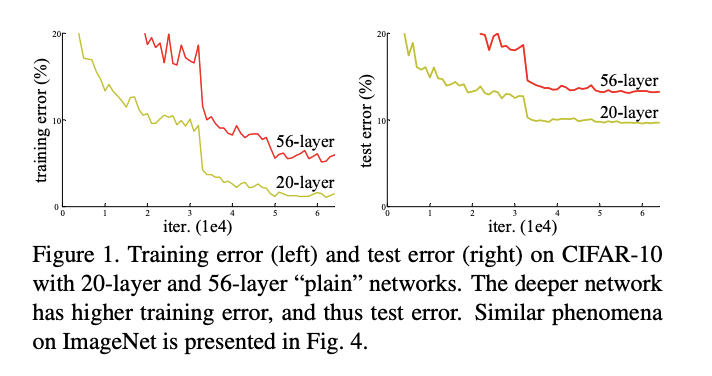

In [12]:
Image("./img/residual_learning_curve.png")

> "When deeper networks are able to start converging, a
degradation problem has been exposed: with the network
depth increasing, accuracy gets saturated (which might be
unsurprising) and then degrades rapidly. Unexpectedly,
such degradation is not caused by overfitting, and adding
more layers to a suitably deep model leads to higher training error, as reported in [11, 42] and thoroughly verified by
our experiments. Fig. 1 shows a typical example."

> "The degradation (of training accuracy) indicates that not
all systems are similarly easy to optimize. Let us consider a
shallower architecture and its deeper counterpart that adds
more layers onto it. There exists a solution by construction
to the deeper model: the added layers are identity mapping,
and the other layers are copied from the learned shallower
model. The existence of this constructed solution indicates
that a deeper model should produce no higher training error
than its shallower counterpart. But experiments show that
our current solvers on hand are unable to find solutions that
are comparably good or better than the constructed solution
(or unable to do so in feasible time)."

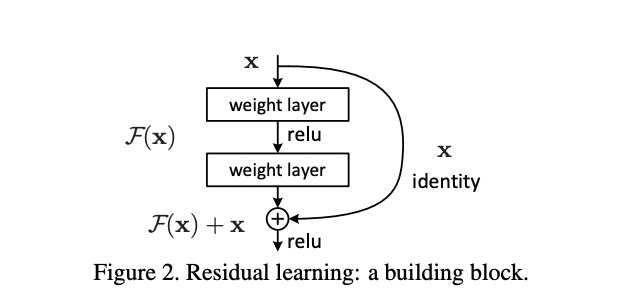

In [11]:
Image("./img/residual_learning.png")

> "In this paper, we address the degradation problem by
introducing a deep residual learning framework. Instead of hoping each few stacked layers directly fit a
desired underlying mapping, we explicitly let these layers fit a residual mapping. Formally, denoting the desired
underlying mapping as H(x), we let the stacked nonlinear
layers fit another mapping of F(x) := H(x)−x. The original mapping is recast into F(x)+x. We hypothesize that it
is easier to optimize the residual mapping than to optimize
the original, unreferenced mapping. To the extreme, if an
identity mapping were optimal, it would be easier to push
the residual to zero than to fit an identity mapping by a stack
of nonlinear layers."

## Positional encoding
Previously we didn't account for word positions at all. The model essentially worked with a bag of words. That's not what we want. 

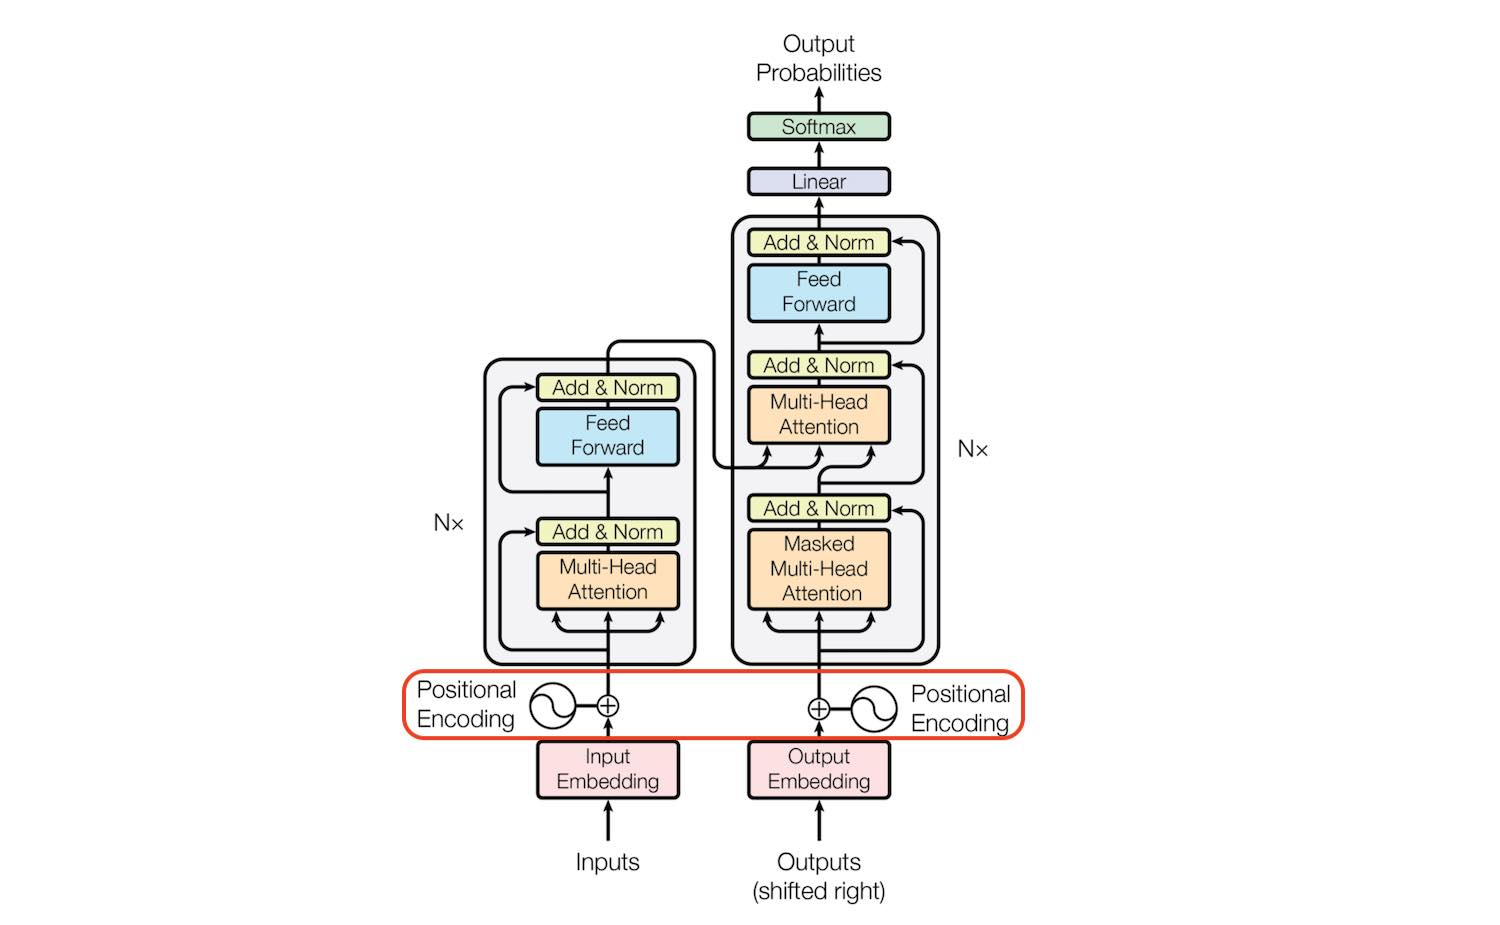

In [6]:
Image("./img/positional_encoding.jpeg")

## Positional encoding: Discrete Fourier Transform-inspired
TODO

## Computational complexity

TODO

## References
  * https://stats.stackexchange.com/questions/421935/what-exactly-are-keys-queries-and-values-in-attention-mechanisms - greate explanation of QKV
  * http://nlp.seas.harvard.edu/2018/04/03/attention.html - annotated Transformer notebook 
  * https://d2l.ai/chapter_attention-mechanisms/index.html - a Tranformer chapter from a great course on Deep Learning
  * https://www.youtube.com/watch?v=OyFJWRnt_AY - Pascal Paupart talk
  * https://www.youtube.com/watch?v=uP_aL_78BcY - Grisha Sapunov talk